In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, accuracy_score


In [ ]:
dataFrame = pd.read_csv('/content/sample_data/customer_staying_or_not.csv')

In [ ]:
dataFrame.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
dataFrame.isnull().sum()
dataFrame.dropna(inplace=True)

In [90]:
pd.set_option('display.max_columns', None)
X = dataFrame.iloc[ : , 3:13]
y = dataFrame.iloc[ : , -1]
print(X)
print(y)

      CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0             619    France  Female   42       2       0.00              1   
1             608     Spain  Female   41       1   83807.86              1   
2             502    France  Female   42       8  159660.80              3   
3             699    France  Female   39       1       0.00              2   
4             850     Spain  Female   43       2  125510.82              1   
...           ...       ...     ...  ...     ...        ...            ...   
9995          771    France    Male   39       5       0.00              2   
9996          516    France    Male   35      10   57369.61              1   
9997          709    France  Female   36       7       0.00              1   
9998          772   Germany    Male   42       3   75075.31              2   
9999          792    France  Female   28       4  130142.79              1   

      HasCrCard  IsActiveMember  EstimatedSalary  
0           

In [91]:
X = pd.get_dummies(X)
columnNames = list(X.columns)
X = X.values
y = y.values

In [92]:
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [93]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42 )

In [104]:
model = Sequential()
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

adam = Adam(learning_rate=0.001)
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy']) 




In [105]:
model.fit(X_train,y_train,epochs=100, verbose=1)

Epoch 1/100
250/250 [==============================] - 1s 1ms/step - loss: 0.5204 - accuracy: 0.7945
Epoch 2/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4699 - accuracy: 0.7945
Epoch 3/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4527 - accuracy: 0.7945
Epoch 4/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4433 - accuracy: 0.7945
Epoch 5/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4387 - accuracy: 0.7945
Epoch 6/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4361 - accuracy: 0.7945
Epoch 7/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4340 - accuracy: 0.7945
Epoch 8/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4323 - accuracy: 0.7945
Epoch 9/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4308 - accuracy: 0.8054
Epoch 10/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4288 - accura

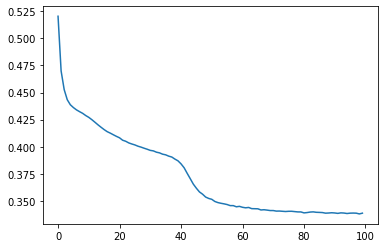

In [106]:
loss = model.history.history['loss']
sns.lineplot(x=range(len(loss)),y=loss)


In [107]:
model.evaluate(X_test,y_test,verbose=1) 

63/63 [==============================] - 0s 1ms/step - loss: 0.3448 - accuracy: 0.8630


[0.3447735905647278, 0.8629999756813049]

In [108]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

cm = confusion_matrix(y_test, y_pred)
print(cm)


63/63 [==============================] - 0s 965us/step
[[1546   61]
 [ 213  180]]


In [111]:
print(columnNames)

['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Geography_France', 'Geography_Germany', 'Geography_Spain', 'Gender_Female', 'Gender_Male']


In [113]:
new_value = [[600,40,3,60000,2,1,1,50000,1,0,0,0,1]]
new_value = scaler.transform(new_value)
model.predict(new_value)


1/1 [==============================] - 0s 20ms/step


array([[0.03195523]], dtype=float32)

In [114]:
model.save('my_model.h5') 
myModel = load_model('my_model.h5')